In [1]:
import numpy as np
import scipy.linalg
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
dt = 0.05
L = 10
N = 256
T = 5
m = 1

In [3]:
dx = 2*L/N
dp = np.pi/L
x = np.arange(-L+L/N,L,dx)
t = np.arange(0,300*dt,dt)
t = np.concatenate((t,np.zeros(300)))
p = np.concatenate((np.arange(0,N/2),np.arange(-N/2,0)))*dp

In [4]:
#### Non matrix version
diag = lambda x: -1/dx**2/2*np.repeat(-2,len(x)) + (x)**2/2
subdiag = lambda x: -1/dx**2/2*np.repeat(1,len(x)-1)

evals, evecs = scipy.linalg.eigh_tridiagonal(diag(x),subdiag(x),select= 'a')

In [5]:
V_diag = x**2/2
u_V = np.exp(-0.5*dt*V_diag*1j).T
T_diag = p**2/2
u_T = np.exp(-dt*T_diag*1j).T
# We'll propagate the ground state just because
psi_0 =  evecs[:,1]
psi_ev = np.array([psi_0]).T
for i in range(600):
    V_diag = (x-t[i]/T)**2/2
    u_V = np.exp(-0.5*dt*V_diag*1j).T
    psi_0 = u_V*psi_ev[:,i]
    psi_0 = fft(psi_0)
    psi_0 *= u_T
    psi_0 = ifft(psi_0)
    psi_0 *= u_V
    psi_0 = np.array([psi_0]).T
    psi_ev = np.hstack([psi_ev,psi_0])

In [9]:
norm_sq = sum(dx*np.abs(psi_ev[:,0])**2)
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi_ev[:,0])**2/norm_sq+evals[7])
line1, = ax.plot(x,(x-t[0]/T)**2/2)
ymax = 1.5*max(np.abs(psi_ev[:,0])**2/norm_sq+evals[7])
ax.set_ylim(ymin = 0, ymax = ymax)

def animate(i):
    line.set_ydata(np.abs(psi_ev[:,i])**2/norm_sq+evals[7])
    line1.set_ydata((x-t[i]/T)**2/2)
    return line,line1,

ani = animation.FuncAnimation(fig, animate, interval = 20, frames = 600)
ani.save("test1.gif")

NameError: name 'psi_ev' is not defined

In [34]:
_psi_ev = np.loadtxt('states_ev.dat',dtype=complex,delimiter=',',converters = {-1: lambda s: complex(0)}).T

In [29]:
len(_psi_ev[:,0])

25000

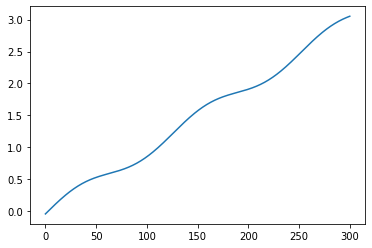

In [12]:
g = dx*np.array([x]).T*np.abs(_psi_ev)**2
plt.plot(g.sum(axis=0))
i = 0

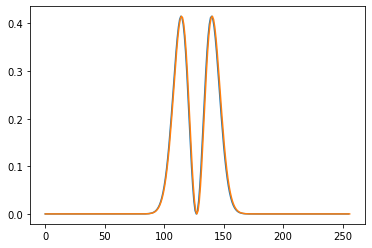

In [25]:
plt.plot(np.abs(_psi_ev[:,i])**2)
plt.plot(np.linspace(0,256,256),np.abs(_psi_ev[:,i])**2/sum(dx*np.abs(_psi_ev[:,i])**2))
i+=5

MovieWriter ffmpeg unavailable; using Pillow instead.


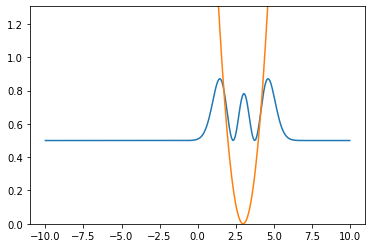

In [11]:
x = np.linspace(-10,10,256)
#_psi_ev = np.loadtxt('states_ev.dat',dtype=complex,delimiter=',',converters = {-1: lambda s: complex(0)}).T
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(_psi_ev[:,0])**2)
line1, = ax.plot(x,(x-t[0]/T)**2/2)
ymax = 1.5*max(np.abs(_psi_ev[:,0])**2+evals[0])
ax.set_ylim(ymin = 0, ymax = ymax)

def animate(i):
    line.set_ydata(np.abs(_psi_ev[:,i])**2+evals[0])
    line1.set_ydata((x-t[i]/T)**2/2)
    return (line,line1)

ani = animation.FuncAnimation(fig, animate, interval = 50, frames = 300)
ani.save("test2.gif")